In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')

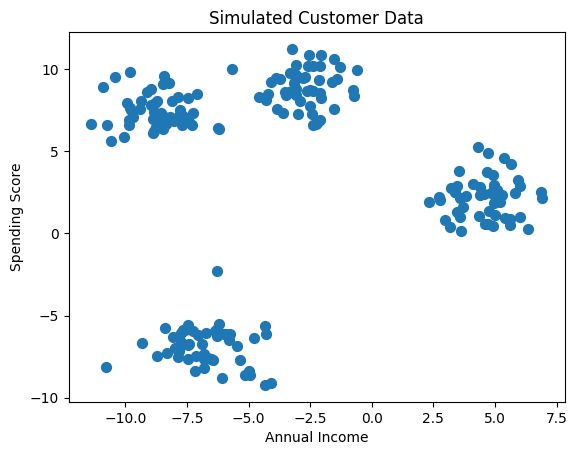

In [2]:
# Step 1: Simulate data for customer segmentation
# For the sake of simplicity, we'll create 2 features: 'Annual Income' and 'Spending Score'
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=1.2, random_state=42)

#Step 2: visulization
# Plot the simulated data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Simulated Customer Data')
plt.show()


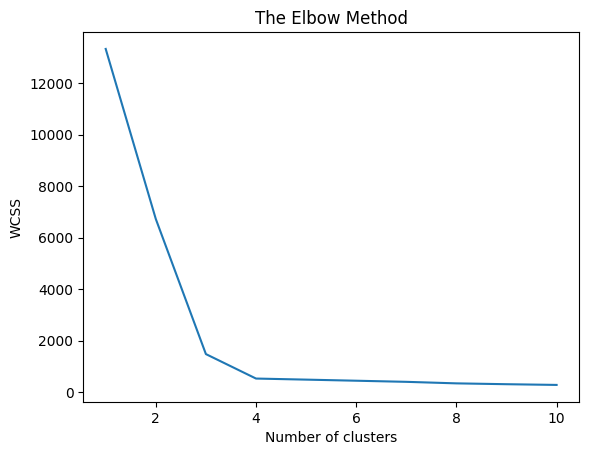

In [3]:
# Step 3: Apply the Elbow Method
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

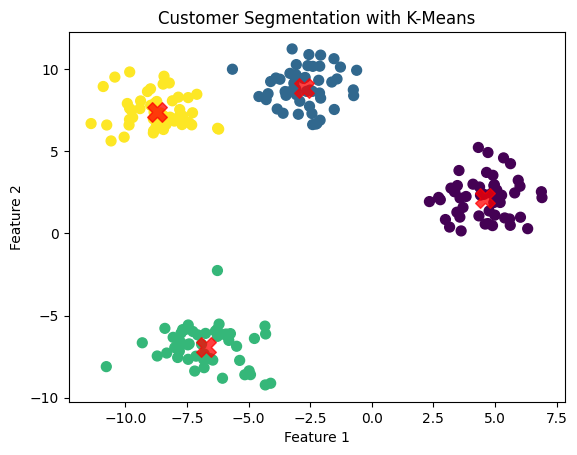

In [4]:
# Step 4: Visualize the final clustering result
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Customer Segmentation with K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.5854850045639337
For n_clusters = 3, the average silhouette_score is : 0.7386549867982449
For n_clusters = 4, the average silhouette_score is : 0.7521029160992404
For n_clusters = 5, the average silhouette_score is : 0.6319790931532315
For n_clusters = 6, the average silhouette_score is : 0.5780899966547786
For n_clusters = 7, the average silhouette_score is : 0.45138290870221653
For n_clusters = 8, the average silhouette_score is : 0.3331396778926818


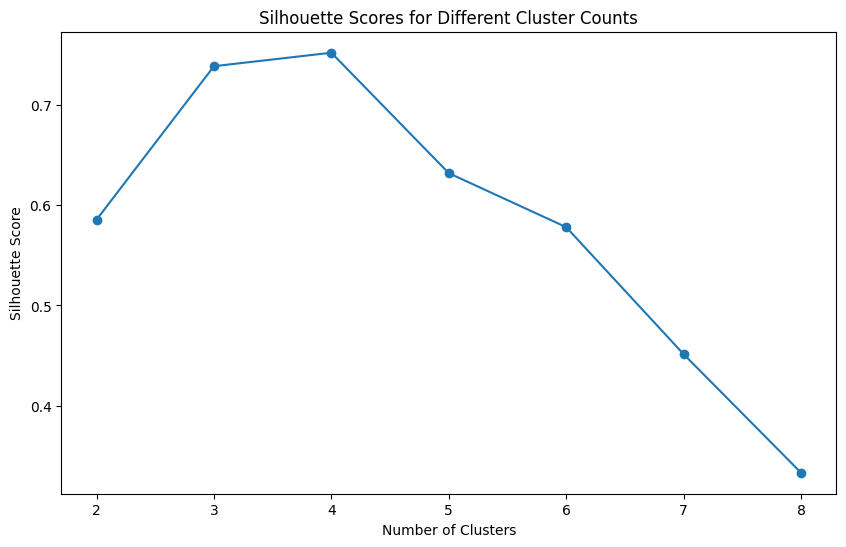

In [5]:
# Step 5: Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title("Silhouette Scores for Different Cluster Counts")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.5854850045639337
For n_clusters = 3, the average silhouette_score is : 0.7386549867982449
For n_clusters = 4, the average silhouette_score is : 0.7521029160992404
For n_clusters = 5, the average silhouette_score is : 0.6319790931532315
For n_clusters = 6, the average silhouette_score is : 0.5780899966547786
For n_clusters = 7, the average silhouette_score is : 0.45138290870221653
For n_clusters = 8, the average silhouette_score is : 0.3331396778926818


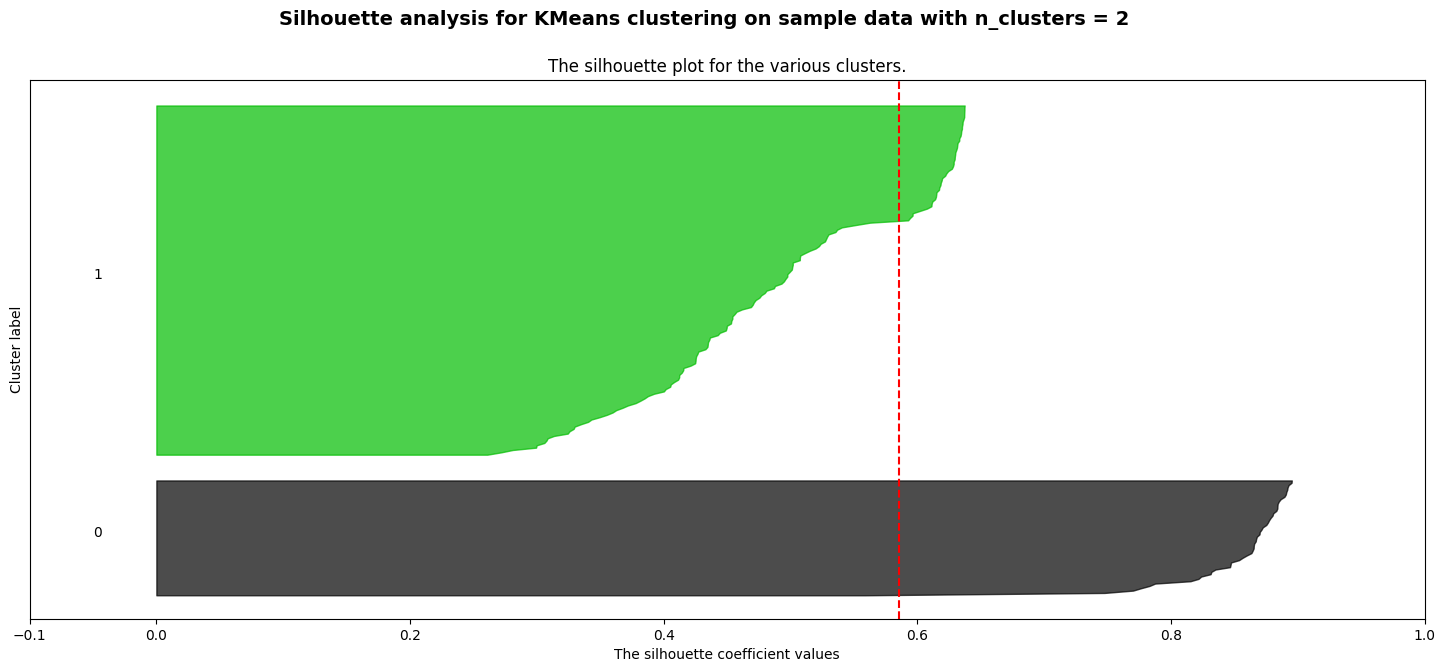

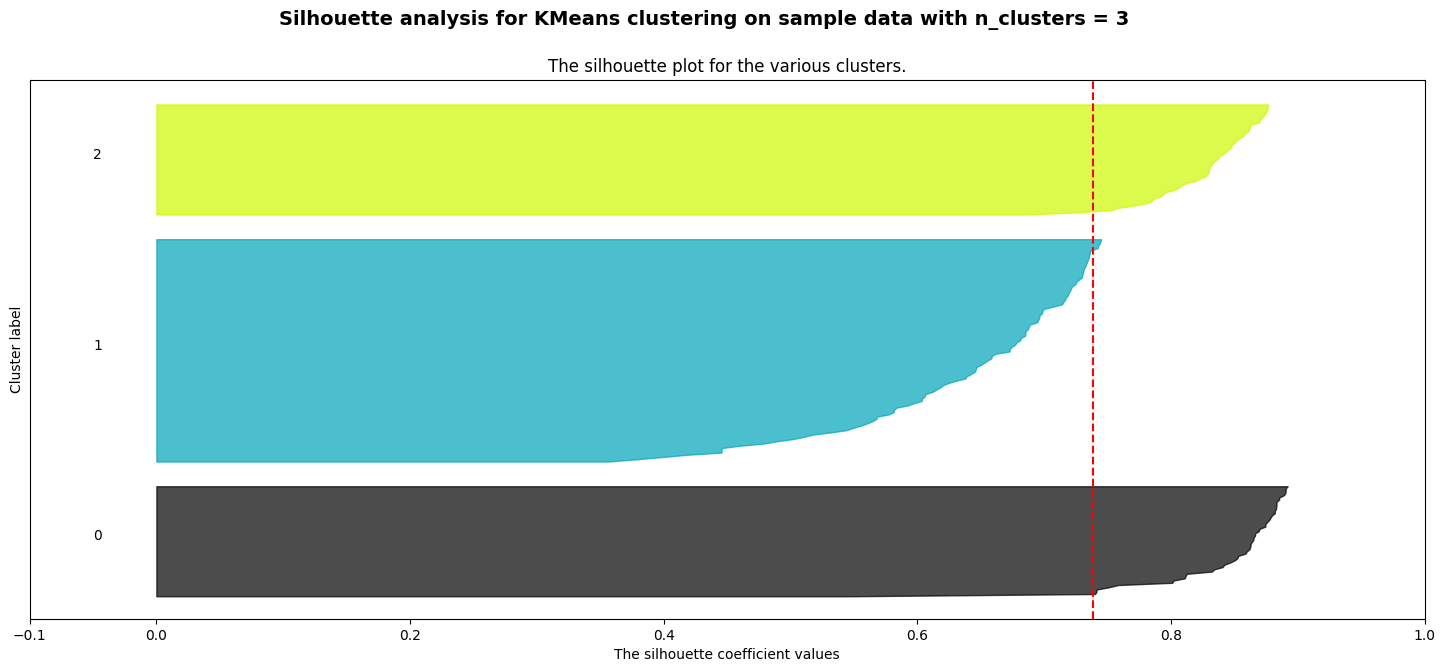

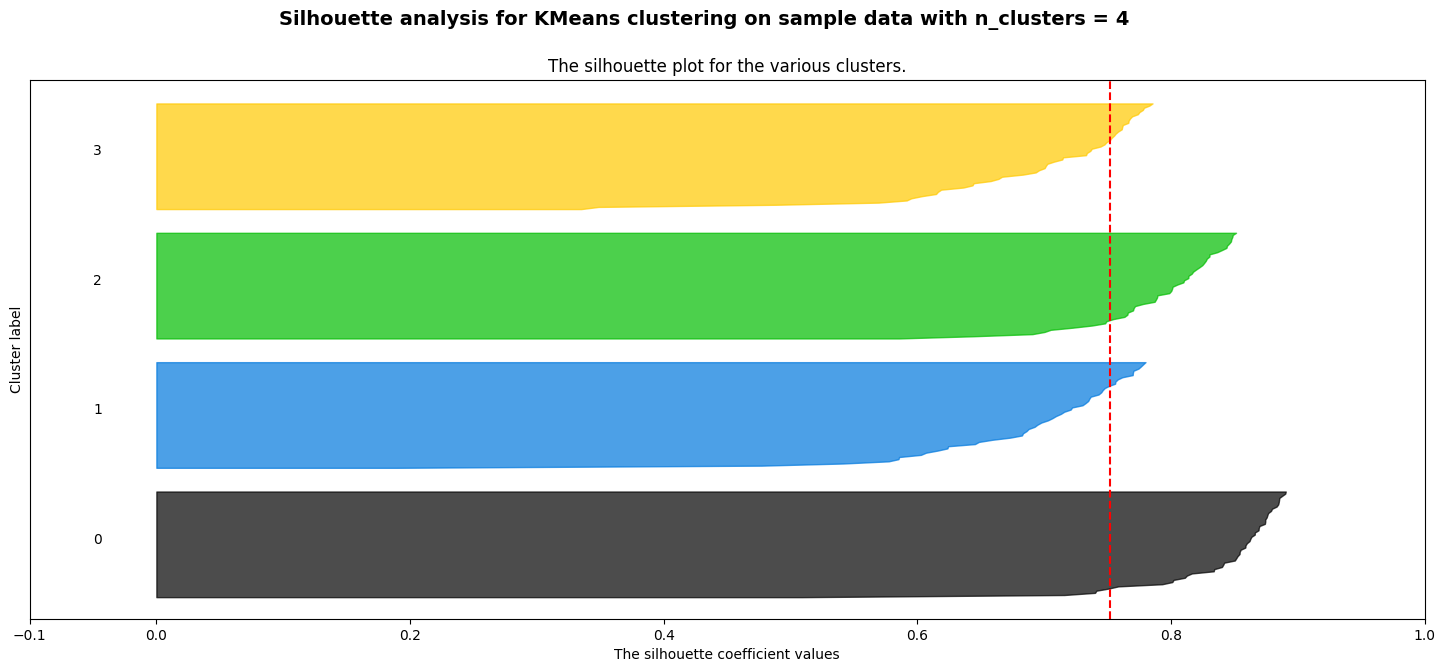

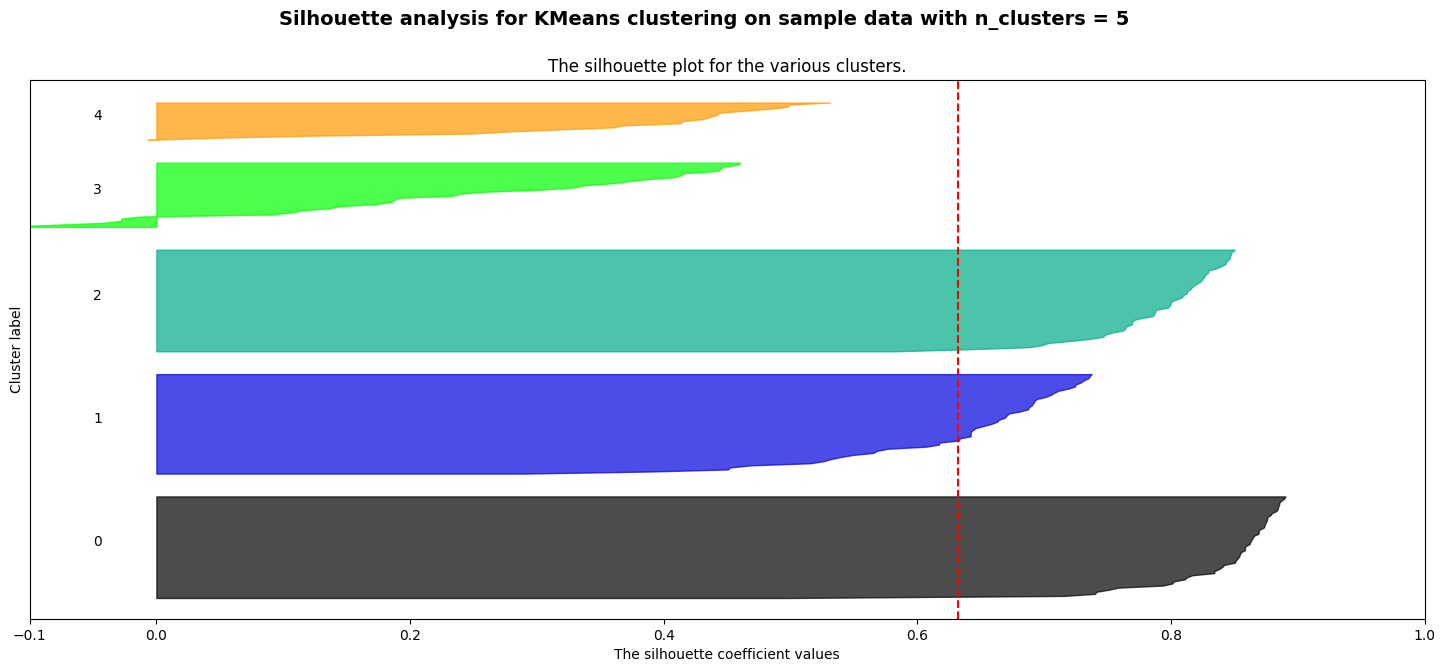

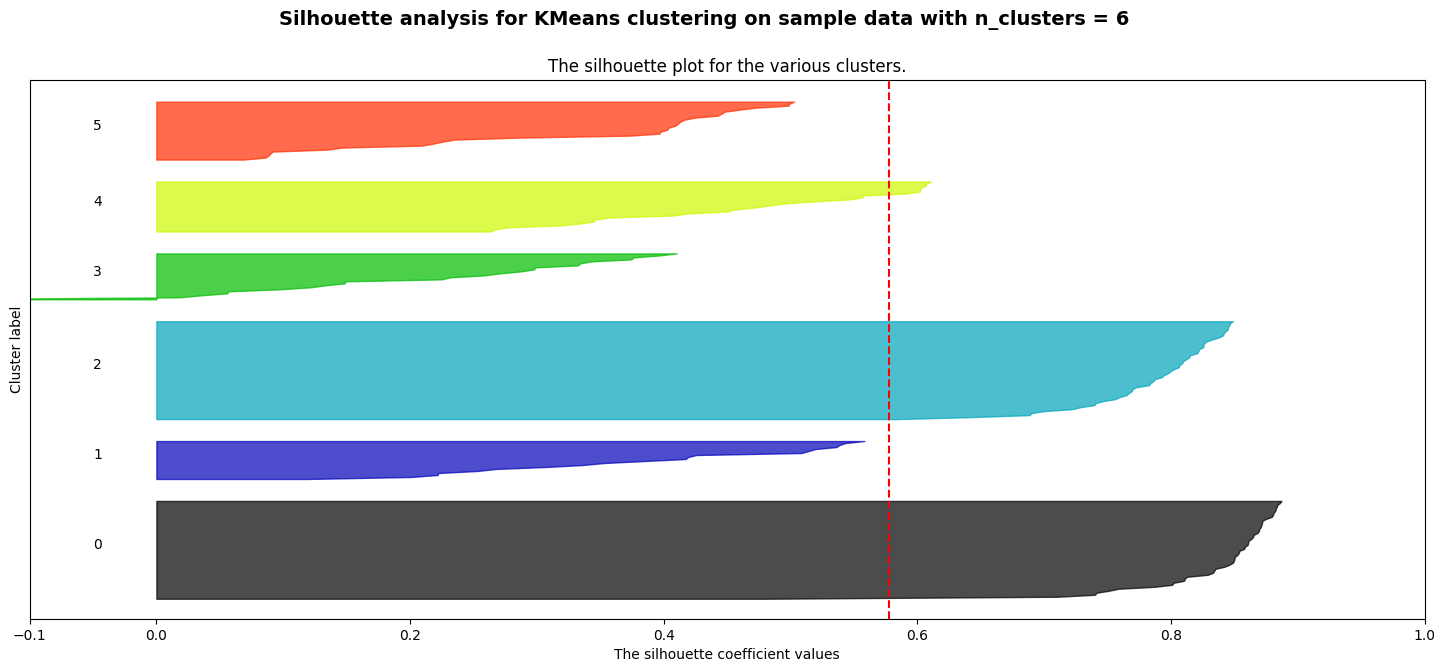

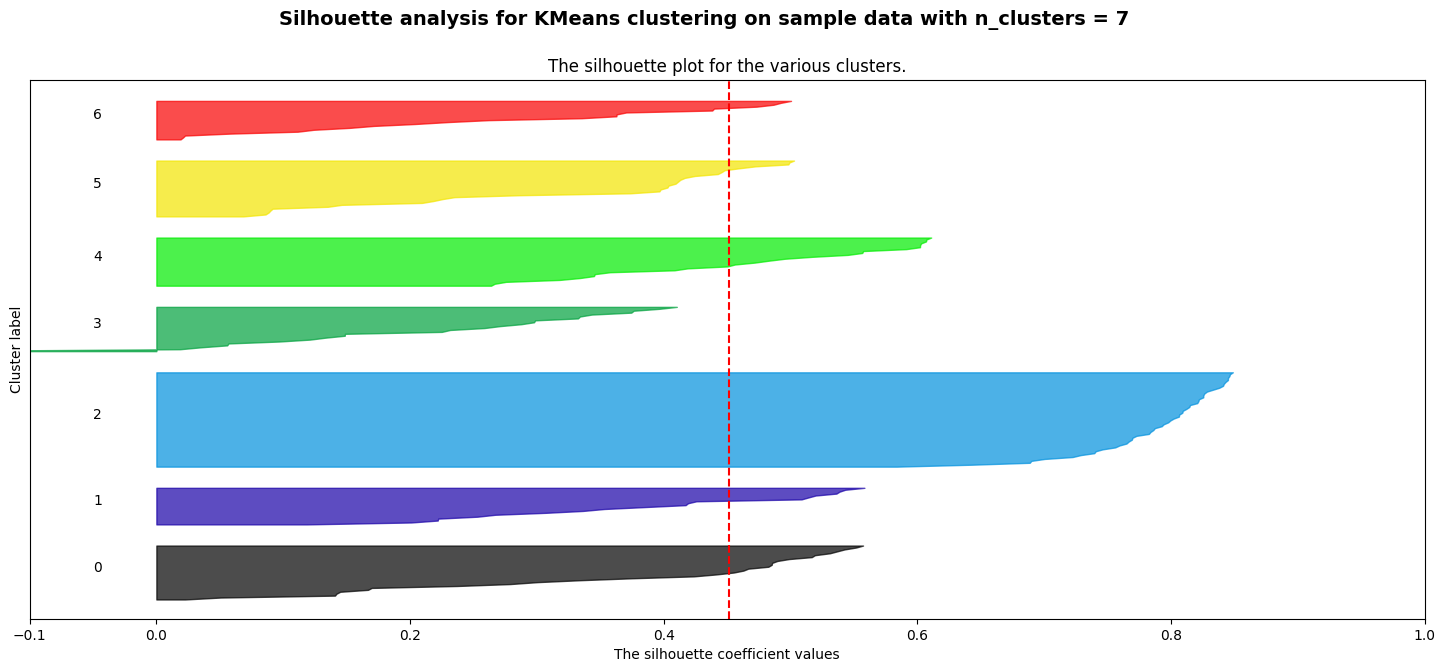

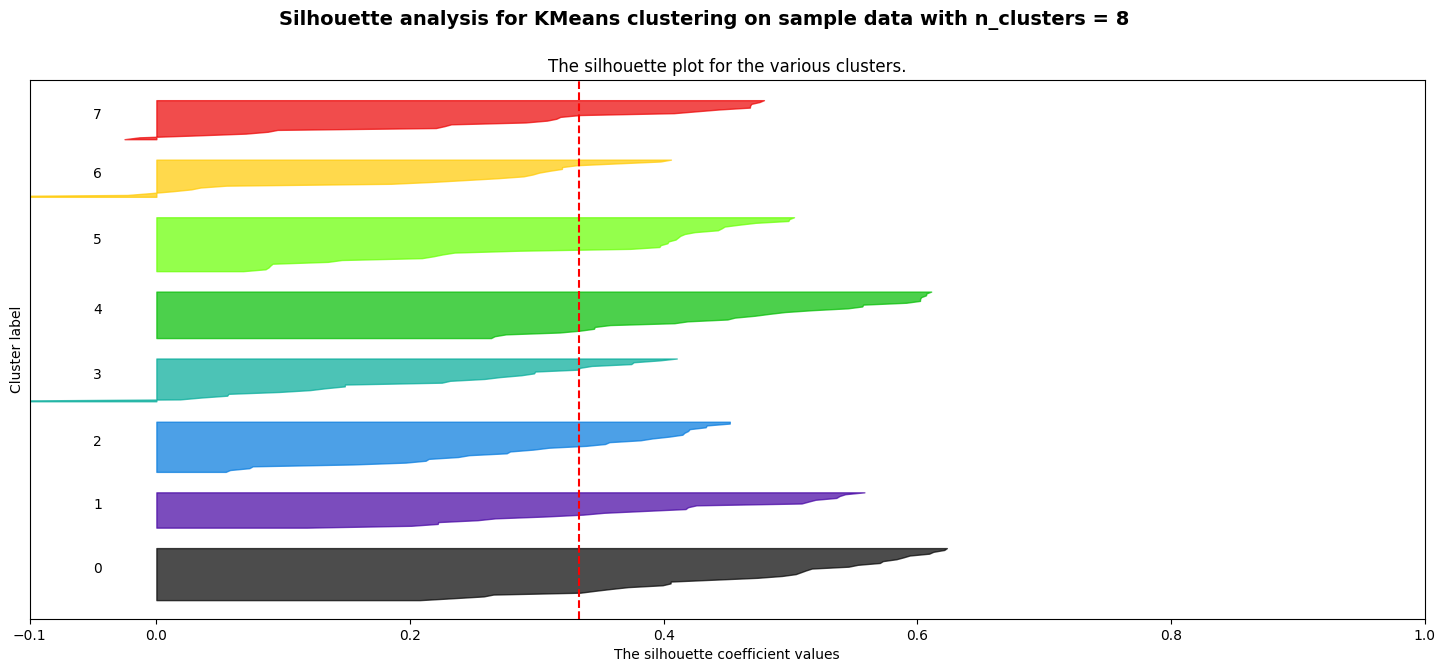

In [6]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
for n_clusters in range_n_clusters:

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
   
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

         # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10   # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()